# Law of large numbers

## Inferential statistics

One major assumption when using *inferential* statistical approaches is that a sample of observations can be used to make generalizations about the overall population of observations. For example, you might survey 10 students in EAE 493 and find that 8 are tired. You might then infer that 24 students (~80%) of the class is tired. This is useful because we may not be able to survey everyone in the class in a reasonable amount of time.

## Inferential statistics in climatology

This same concept applies to climatology. When we record an observation of high temperatures on one sunny August day, we might start to make inferences about all August days. If we then make an observation of a high temperature on a rainy day, our inferential model of August days based on one sunny day observation might seem wildly inaccurate:

| August date | High Temperature | Inference                   | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               | August days have highs of 85|   -   |
| 08/02/1991  | 65               | August days have highs of 65|  20 F |

If we continue to seesaw between what happened just on the previous day, our statistical model will be hopelessly chasing a moving target:

| August date | High Temperature | Inference                   | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               |             -               |   -   |
| 08/02/1991  | 65               | August days have highs of 85|  20 F |
| 08/03/1991  | 75               | August days have highs of 65|  10 F |

However, if we use the *mean* of August days, we can start to create a more useful model that blends what we know about multiple August days:

| August date | High Temperature | Inference (mean)            | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               |             -               |   -   |
| 08/02/1991  | 65               | August days have highs of 85|  20 F |
| 08/03/1991  | 75               | August days have highs of 75|  0  F |

Of course, nature does not always play nicely:

| August date | High Temperature | Inference (mean)            | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               |             -               |   -   |
| 08/02/1991  | 65               | August days have highs of 85|  20 F |
| 08/03/1991  | 75               | August days have highs of 75|  0  F |
| 08/04/1991  | 100              | August days have highs of 75|  25  F|

## The importance of climate science knowledge

We can use our knowledge of climate to know that August temperatures have a tendency to be relatively warm. We can draw this conclusion in two ways:
1) Experience -- we know the location well and have expectations of August high temperatures.
2) Energy Balance Models -- we understand the physics behind balancing insolation and terrestrial radiation and how relatively high solar angles in August would result in a higher equilibrium temperature during August afternoons.

## Temperature distributions

We would not expect a high of 32, nor would we expect a high of 150. This suggests that the *distribution* of temperatures is not random. Furthermore, even high temperatures within the range of what is possible (e.g., 50 or 110) intuitively seem less likely to occur than other high temperatures (e.g., 80). This suggests that the distribution of August temperatures has a *central tendency* with *outliers* both above and below. In other words, the *mean* of all observations might have a relatively high probability of being the actual observation. But how do you determine these values?

## Large numbers

Going back to the survey on tired students in class, we intuitively know that if we ask too few people if they are tired, this may not be representative of the entire class. Student Alex might always be tired. So if he is the only survey respondant, we might assume 100% of the class is tired. In other words, *sample size* matters, and a sufficient amount of observations is needed to produce a useful inferential model.

### Climate Normals

We generally report long-term averages of various weather observations based on 30 years of data. We can simulate *why* this is important in the following code block:

In [1]:
import random

def get_random_floats(mean_value, std_value, count):
    
    random_numbers = []

    for i in range(count):
    
        random_float = random.gauss(mu=mean_value, sigma=std_value)

        random_numbers.append(random_float)

    return random_numbers

def get_mean_of_list(list_name):
    # this solution is forbidden for HW3. See rules.
   
    return sum(list_name) / len(list_name)
   
aug_climate_mean = 80
std_of_aug_temperatures = 6

print("Mean of normal distribution is:", aug_climate_mean, "st.d. is:", std_of_aug_temperatures)

for count_of_numbers in [1, 5, 10, 30]:

    random_floats = get_random_floats(aug_climate_mean, std_of_aug_temperatures, count_of_numbers)

    random_float_mean = get_mean_of_list(random_floats)

    print(f"The mean temperature of the list is: {random_float_mean:.2f} for {count_of_numbers:d} August mean temperatures")

Mean of normal distribution is: 80 st.d. is: 6
The mean temperature of the list is: 71.59 for 1 August mean temperatures
The mean temperature of the list is: 81.63 for 5 August mean temperatures
The mean temperature of the list is: 81.97 for 10 August mean temperatures
The mean temperature of the list is: 80.43 for 30 August mean temperatures


### Experiment

1) Change ```std_of_june_temperatures```. What do you notice about the results?
2) Change ```june_climate_mean```. What do you notice about the results?
3) Add larger numbers to this list: ```for count_of_numbers in [1, 5, 10, 30]:```. Compare the results of small counts to large counts.

### Normal Distributions

The above example randomly generates numbers based on defining a *known* distribution around a mean defined by ```aug_climate_mean``` and ```std_of_aug_temperatures```. This simulates a situation where we know the actual distribution of August temperatures. In reality, we are just slowly building statistical confidence with each year of August observations. Our job will never be complete! In fact, *nonstationarity* may make what we know about August temperatures irrelevant as we experience the influence of climate change on those values.

The following plot visualizes the above example. Modify the standard deviation and mean to see how this changes the plot:

NOTE: Make sure you have run all of the code examples before you run this code block.

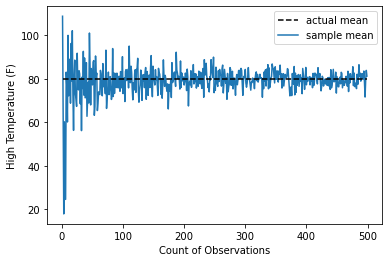

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

aug_climate_mean = 80
std_of_aug_temperatures = 60
observation_count_range = range(1, 500)

plt.plot(observation_count_range, [aug_climate_mean]*len(observation_count_range), 'k--', label='actual mean', zorder=10)
plt.ylabel("High Temperature (F)")
plt.xlabel("Count of Observations")

mean_result = []

for count_of_numbers in observation_count_range:

    random_floats = get_random_floats(aug_climate_mean, std_of_aug_temperatures, count_of_numbers)

    random_float_mean = get_mean_of_list(random_floats)

    mean_result.append(random_float_mean)

plt.plot(observation_count_range, mean_result, '-', label='sample mean')

plt.legend()